# Permutation Test

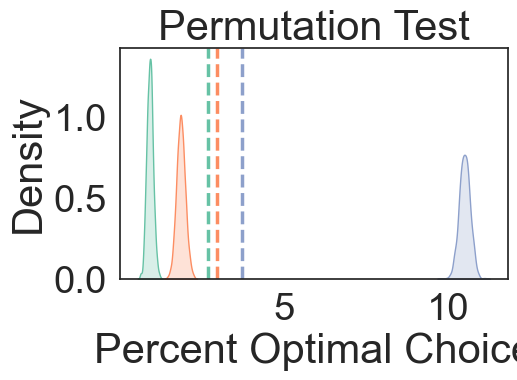

In [1]:
import pandas as pd
import numpy as np
import numpy
import csv
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
import itertools
# from statsmodels.tsa.api import SimpleExpSmoothing
# from scipy.optimize import curve_fit


num_decisions_to_consider = 20
q_cols = ['key_resp_3.keys','key_resp_13.keys','key_resp_14.keys','key_resp_15.keys','key_resp_16.keys','key_resp_25.keys','key_resp_26.keys','key_resp_27.keys','key_resp_28.keys','key_resp_29.keys','key_resp_30.keys','key_resp_31.keys','key_resp_32.keys','key_resp_33.keys','key_resp_34.keys','key_resp_35.keys']
trial_type = 'r2'
reverse_counters = [1, 3, 8, 10, 11]

csv_lines = [['depth3_score', 'depth2_score', 'depth1_score']]

reverse_dict = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
subs = [x for x in os.listdir(os.curdir) if x.startswith('5') or x.startswith('6')]

timepoints_tracker = [['1'] * num_decisions_to_consider + ['2'] * num_decisions_to_consider + ['3'] * num_decisions_to_consider]
timepoints_tracker = list(itertools.chain.from_iterable(timepoints_tracker))

csv_final = [['subject', 'optimal_delayed_score', 'score_depth1', 'score_depth2', 'score_depth3', 'worry']]

zebra_dict = {1: 'right', 2: 'left', 3: 'left'}
decision_answers = ['plan1_response.keys', 'plan2_response.keys', 'plan3_response.keys']

accepted_responses = ['left', 'right', 'space']

for i in range(1000):
    score_depth3 = 0
    score_depth2 = 0
    score_depth1 = 0

    for sub in subs:
        df = pd.read_csv(sub)
        df = df[df['plan2_response.keys'].isin(accepted_responses)]
        
        plan_depth_col = df['r2']
        df = df[decision_answers]  # Shuffle each row

        for idx, row in df.iterrows():
            df.loc[idx] = np.random.permutation(row)

        # Shuffle each column
        for col in df.columns:
            df[col] = np.random.permutation(df[col])

        df[trial_type] = plan_depth_col
        df = df.reset_index(drop=True)

        planning_trial_num = 0

        for row in range(len(df)):
            if planning_trial_num < 60:
                try:
                    if 'cat' in df[trial_type][row]:
                        goal = 'depth=3'
                        optimal_delayed_score = 0

                        if df[decision_answers[0]][row] != 'space':
                            if df[decision_answers[1]][row] != 'space':
                                if df[decision_answers[2]][row] != 'space':
                                    optimal_delayed_score += 1

                        score_depth3 += optimal_delayed_score
                        planning_trial_num += 1

                    elif 'zebra' in df[trial_type][row]:
                        goal = 'depth=2'
                        optimal_delayed_score = 0

                        if df[decision_answers[0]][row] == 'space':
                            if df[decision_answers[1]][row] != 'space':
                                if df[decision_answers[2]][row] != 'space':
                                    optimal_delayed_score += 1
                        score_depth2 += optimal_delayed_score
                        planning_trial_num += 1

                    elif 'lamp' in df[trial_type][row]:
                        goal = 'depth=1'
                        optimal_delayed_score = 0

                        if df[decision_answers[0]][row] == 'space':
                            if df[decision_answers[1]][row] == 'space':
                                if df[decision_answers[2]][row] != 'space':
                                    optimal_delayed_score += 1
                        score_depth1 += optimal_delayed_score
                        planning_trial_num += 1
                        if optimal_delayed_score < 0:
                            optimal_delayed_score = 0

                except:
                    nan_found = 1
    print([score_depth3/len(subs), score_depth2/len(subs), score_depth1/len(subs)])
    csv_lines.append([score_depth3/len(subs), score_depth2/len(subs), score_depth1/len(subs)])

with open('permutations_optimal_score.csv'.format(num_decisions_to_consider), 'w') as f:
    writer = csv.writer(f)
    writer.writerows(csv_lines)


# Empirical Optimal Choice - And Plotting 

depth3
depth2
depth1


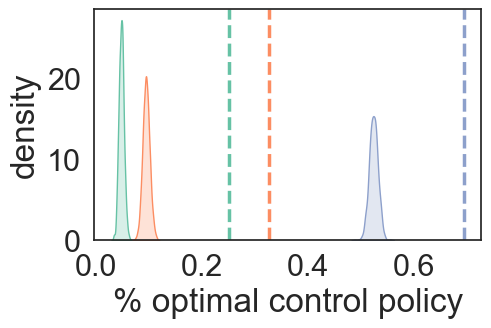

In [29]:
# import pandas as pd
# import numpy as np
# import numpy
# import csv
# import os
# import random
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import sem
# import itertools
# # from statsmodels.tsa.api import SimpleExpSmoothing
# # from scipy.optimize import curve_fit


# num_decisions_to_consider = 20
# q_cols = ['key_resp_3.keys','key_resp_13.keys','key_resp_14.keys','key_resp_15.keys','key_resp_16.keys','key_resp_25.keys','key_resp_26.keys','key_resp_27.keys','key_resp_28.keys','key_resp_29.keys','key_resp_30.keys','key_resp_31.keys','key_resp_32.keys','key_resp_33.keys','key_resp_34.keys','key_resp_35.keys']
# trial_type = 'r2'
# reverse_counters = [1, 3, 8, 10, 11]

# csv_lines = [['depth3_score', 'depth2_score', 'depth1_score']]

# reverse_dict = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
# subs = [x for x in os.listdir(os.curdir) if x.startswith('5') or x.startswith('6')]

# timepoints_tracker = [['1'] * num_decisions_to_consider + ['2'] * num_decisions_to_consider + ['3'] * num_decisions_to_consider]
# timepoints_tracker = list(itertools.chain.from_iterable(timepoints_tracker))

# csv_final = [['subject', 'optimal_delayed_score', 'score_depth1', 'score_depth2', 'score_depth3', 'worry']]

# zebra_dict = {1: 'right', 2: 'left', 3: 'left'}
# decision_answers = ['plan1_response.keys', 'plan2_response.keys', 'plan3_response.keys']

# accepted_responses = ['left', 'right', 'space']

# score_depth3 = 0
# score_depth2 = 0
# score_depth1 = 0

# for sub in subs:
#     print(sub)
#     df = pd.read_csv(sub)
#     df = df[df['plan2_response.keys'].isin(accepted_responses)]
    
#     plan_depth_col = df['r2']
#     df = df[decision_answers]  # Shuffle each row



#     df[trial_type] = plan_depth_col
#     df = df.reset_index(drop=True)

#     planning_trial_num = 0

#     for row in range(len(df)):
#         if planning_trial_num < 60:
#             try:
#                 if 'cat' in df[trial_type][row]:
#                     goal = 'depth=3'
#                     optimal_delayed_score = 0

#                     if df[decision_answers[0]][row] != 'space':
#                         if df[decision_answers[1]][row] != 'space':
#                             if df[decision_answers[2]][row] != 'space':
#                                 optimal_delayed_score += 1

#                     score_depth3 += optimal_delayed_score
#                     planning_trial_num += 1

#                 elif 'zebra' in df[trial_type][row]:
#                     goal = 'depth=2'
#                     optimal_delayed_score = 0

#                     if df[decision_answers[0]][row] == 'space':
#                         if df[decision_answers[1]][row] != 'space':
#                             if df[decision_answers[2]][row] != 'space':
#                                 optimal_delayed_score += 1
#                     score_depth2 += optimal_delayed_score
#                     planning_trial_num += 1

#                 elif 'lamp' in df[trial_type][row]:
#                     goal = 'depth=1'
#                     optimal_delayed_score = 0

#                     if df[decision_answers[0]][row] == 'space':
#                         if df[decision_answers[1]][row] == 'space':
#                             if df[decision_answers[2]][row] != 'space':
#                                 optimal_delayed_score += 1
#                     score_depth1 += optimal_delayed_score
#                     planning_trial_num += 1
#                     if optimal_delayed_score < 0:
#                         optimal_delayed_score = 0

#             except:
#                 nan_found = 1
# print([score_depth3/len(subs), score_depth2/len(subs), score_depth1/len(subs)])
# csv_lines.append([score_depth3/len(subs), score_depth2/len(subs), score_depth1/len(subs)])

# with open('permutations_optimal_score_ACTUALSUBS.csv'.format(num_decisions_to_consider), 'w') as f:
#     writer = csv.writer(f)
#     writer.writerows(csv_lines)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', palette='mako', font_scale=2.0, rc=None)

#
results_df_empirical = pd.read_csv('permutations_optimal_score_ACTUALSUBS.csv')

# Read the CSV file
results_df = pd.read_csv('permutations_optimal_score.csv')

# Define the critical values for each planning depth
critical_values = {'depth1':results_df_empirical['depth3_score'][0]/20.0, 'depth2': results_df_empirical['depth2_score'][0]/20.0, 'depth3':results_df_empirical['depth1_score'][0]/20.0}

# Reshape the DataFrame from wide to long format
results_df = pd.melt(results_df, var_name='planning_depth', value_name='score')

# Remove the '_score' suffix so that the planning_depth values match the keys in critical_values
results_df['planning_depth'] = results_df['planning_depth'].str.replace('_score', '')
results_df['percent_score'] = results_df['score']/20.0

# Define the desired order: reverse of alphabetical so that depth3 comes first
order = ['depth3', 'depth2', 'depth1']
order2 = ['depth1', 'depth2', 'depth3']

# Create a Set2 palette with 3 colors and reverse it so that the blue color (typically the last in Set2) is assigned to depth3
palette = dict(zip(order, sns.color_palette("Set2", 3)[::-1]))
palette2 = dict(zip(order2, sns.color_palette("Set2", 3)[::-1]))

# Set up the single figure
plt.figure(figsize=(5, 3))

# Plot the histograms (with KDE) for each planning depth on the same axes, using the specified hue order and palette
sns.kdeplot(
    data=results_df,
    x='percent_score',
    hue='planning_depth',
    hue_order=order,
    fill=True,
    palette=palette,
    legend=False
)

# Overlay the critical value lines in the corresponding color for each planning depth
for depth in order:
    print(depth)
    plt.axvline(x=critical_values[depth], color=palette2[depth], linewidth=2.5, linestyle='--', label=f'{depth} critical')

# # Deduplicate legend entries (in case the same label appears twice)
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# # plt.legend(by_label.values(), by_label.keys())

# Add labels and title
plt.xlabel('% optimal control policy')
plt.ylabel('density')
# plt.title('Permutation Test')
plt.savefig('permtest.png', dpi=300, bbox_inches='tight')
plt.show()
